Q1

(a) Compute the average, standard deviation, 25th, 50th, and 75th percentiles based on the monthly
returns of the 12 portfolios.

In [88]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#read the csv file into dataframe monthly
monthly = pd.read_csv('monthly2022.csv', index_col=0, header=None)


     Average  Standard Deviation  25th Percentile  50th Percentile  \
1   0.009190            0.053429        -0.018313         0.012866   
2   0.012013            0.071652        -0.020466         0.014148   
3   0.016794            0.103055        -0.029751         0.009320   
4   0.012894            0.088126        -0.026246         0.011118   
5   0.011349            0.079194        -0.022683         0.010806   
6   0.010877            0.074596        -0.024597         0.012692   
7   0.011015            0.071883        -0.022659         0.012491   
8   0.010814            0.069740        -0.022555         0.014197   
9   0.010725            0.066794        -0.022541         0.014180   
10  0.009915            0.062993        -0.021986         0.013715   
11  0.010304            0.059706        -0.019272         0.014061   
12  0.008851            0.051211        -0.017289         0.012404   

    75th Percentile  
1          0.039323  
2          0.043246  
3          0.053341  
4

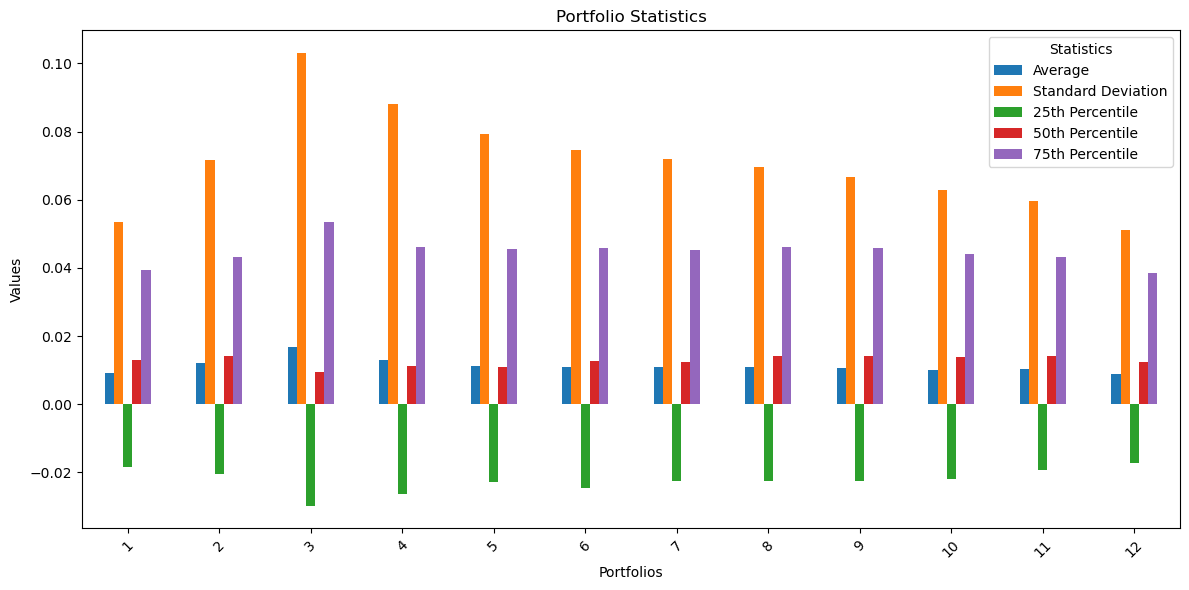

In [8]:
#select the columns for the monthly returns
returns = monthly.iloc[:, 0:12]

#compute the required statistics
average = returns.mean()
std_dev = returns.std()
percentiles_25 = returns.quantile(0.25)
percentiles_50 = returns.quantile(0.50)
percentiles_75 = returns.quantile(0.75)

#combine results into a df results
results_1a = pd.DataFrame({
    'Average': average,
    'Standard Deviation': std_dev,
    '25th Percentile': percentiles_25,
    '50th Percentile': percentiles_50,
    '75th Percentile': percentiles_75
})

# Display the results
print(results_1a)

results_1a.plot(kind='bar', figsize=(12, 6))
plt.title('Portfolio Statistics')
plt.ylabel('Values')
plt.xlabel('Portfolios')
plt.xticks(rotation=45)
plt.legend(title='Statistics')
plt.tight_layout()

(b) Compute the coefficients of skewness and (excess) kurtosis based on the monthly returns of
the 12 portfolios. For each coefficient, perform a test of normality. What’s your conclusion of the
normality of stock returns in the U.S.?

    Skewness   Kurtosis
1   0.128859   7.547298
2   1.441609  14.870734
3   2.931172  24.387814
4   1.993392  18.550252
5   1.909833  21.157381
6   1.101231  11.923533
7   0.863045  10.952004
8   0.613991   8.923560
9   0.422141   7.857488
10  0.261809   7.915373
11  0.178771   7.514624
12  0.069362   6.980189


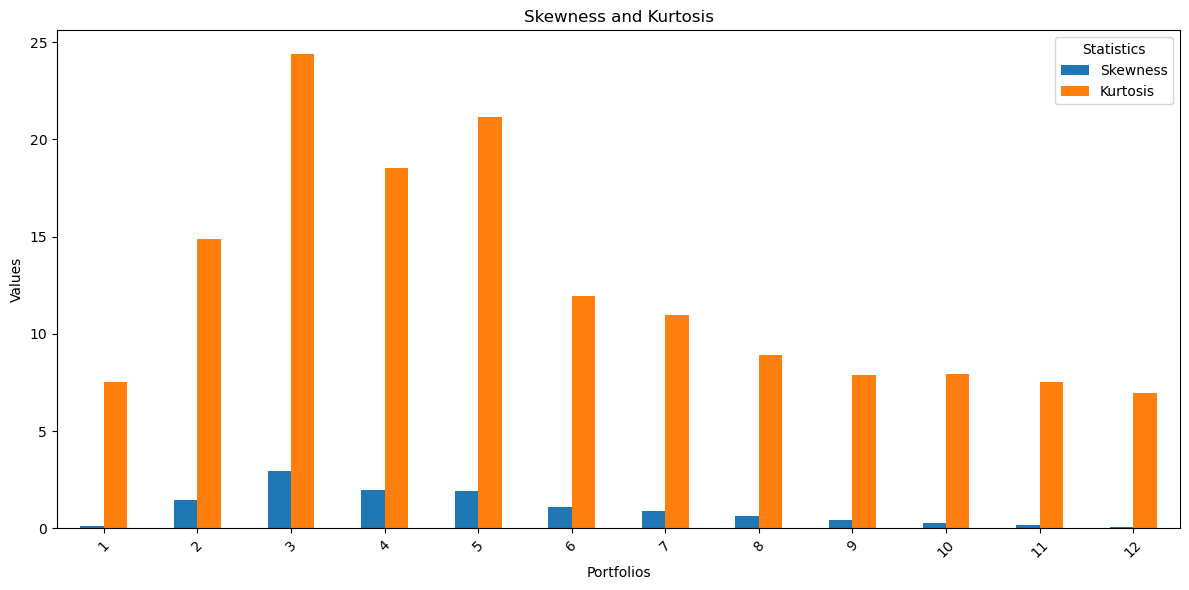

In [10]:
#calculate skewness and excess kurtosis for each portfolio
skewness = returns.apply(stats.skew)
kurtosis = returns.apply(stats.kurtosis)

#combine results into a df results
results_1b = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})
print(results_1b)

results_1b.plot(kind='bar', figsize=(12, 6))
plt.title('Skewness and Kurtosis')
plt.ylabel('Values')
plt.xlabel('Portfolios')
plt.xticks(rotation=45)
plt.legend(title='Statistics')
plt.tight_layout()

In [12]:
#normality test
for index, row in results_1b.iterrows():
    skewness = row['Skewness']
    kurtosis = row['Kurtosis']
    
    skewness_result = "Normal" if abs(skewness) < 1 else "Significantly skewed"
    kurtosis_result = "Normal" if kurtosis < 4 else "Leptokurtic (heavy tails)"
    
    print(f"{index}:")
    print(f"  Skewness: {skewness:.6f} - {skewness_result}")
    print(f"  Kurtosis: {kurtosis:.6f} - {kurtosis_result}")
    print()

1:
  Skewness: 0.128859 - Normal
  Kurtosis: 7.547298 - Leptokurtic (heavy tails)

2:
  Skewness: 1.441609 - Significantly skewed
  Kurtosis: 14.870734 - Leptokurtic (heavy tails)

3:
  Skewness: 2.931172 - Significantly skewed
  Kurtosis: 24.387814 - Leptokurtic (heavy tails)

4:
  Skewness: 1.993392 - Significantly skewed
  Kurtosis: 18.550252 - Leptokurtic (heavy tails)

5:
  Skewness: 1.909833 - Significantly skewed
  Kurtosis: 21.157381 - Leptokurtic (heavy tails)

6:
  Skewness: 1.101231 - Significantly skewed
  Kurtosis: 11.923533 - Leptokurtic (heavy tails)

7:
  Skewness: 0.863045 - Normal
  Kurtosis: 10.952004 - Leptokurtic (heavy tails)

8:
  Skewness: 0.613991 - Normal
  Kurtosis: 8.923560 - Leptokurtic (heavy tails)

9:
  Skewness: 0.422141 - Normal
  Kurtosis: 7.857488 - Leptokurtic (heavy tails)

10:
  Skewness: 0.261809 - Normal
  Kurtosis: 7.915373 - Leptokurtic (heavy tails)

11:
  Skewness: 0.178771 - Normal
  Kurtosis: 7.514624 - Leptokurtic (heavy tails)

12:
  Ske

In [94]:
#analyze skewness and kurtosis for normality
for index, row in results_1b.iterrows():
    skewness = row['Skewness']
    kurtosis = row['Kurtosis']
    
    skewness_result = "Normal" if abs(skewness) < 1 else "Significantly skewed"
    kurtosis_result = "Normal" if kurtosis < 4 else "Leptokurtic (heavy tails)"
    
    results_1b.at[index, 'Skewness Result'] = skewness_result
    results_1b.at[index, 'Kurtosis Result'] = kurtosis_result

#display the summary table
print("Summary of Normality Tests:")
print(results_1b)

Summary of Normality Tests:
    Skewness   Kurtosis       Skewness Result            Kurtosis Result
1   0.128859   7.547298                Normal  Leptokurtic (heavy tails)
2   1.441609  14.870734  Significantly skewed  Leptokurtic (heavy tails)
3   2.931172  24.387814  Significantly skewed  Leptokurtic (heavy tails)
4   1.993392  18.550252  Significantly skewed  Leptokurtic (heavy tails)
5   1.909833  21.157381  Significantly skewed  Leptokurtic (heavy tails)
6   1.101231  11.923533  Significantly skewed  Leptokurtic (heavy tails)
7   0.863045  10.952004                Normal  Leptokurtic (heavy tails)
8   0.613991   8.923560                Normal  Leptokurtic (heavy tails)
9   0.422141   7.857488                Normal  Leptokurtic (heavy tails)
10  0.261809   7.915373                Normal  Leptokurtic (heavy tails)
11  0.178771   7.514624                Normal  Leptokurtic (heavy tails)
12  0.069362   6.980189                Normal  Leptokurtic (heavy tails)


Skewness:  
-U.S. stock returns often exhibit positive skewness, indicating that there are more frequent small losses and a few extreme gains.  
-This suggests that returns are not perfectly symmetrical, which is a common characteristic of financial data.  
  
Kurtosis:  
-The kurtosis of stock returns is typically greater than 3, indicating heavier tails (leptokurtic distribution). This means there are more extreme outcomes (large gains or losses) than would be expected in a normal distribution.  
-The presence of leptokurtic behavior suggests higher risk, as extreme price movements are more likely than a normal distribution would predict.
  


(c) Repeat the exercises in parts (a) and (b) but based on the returns for the month of January as
well as for the rest of year. What’s your conclusion of stock returns in January compared with
other months?

In [ ]:
monthly.index = pd.to_datetime(monthly.index.astype(str), format='%Y%m%d')

In [122]:
# Create a DataFrame for January only
jan_data = monthly[monthly.index.month == 1]
jan_data.iloc[:, 0:12]

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1926-01-30,0.000561,0.023174,0.143660,0.043982,0.003839,0.021334,0.026445,-0.001635,0.004253,0.002818,0.004725,-0.003837
1927-01-31,0.002416,0.012556,0.003172,0.002805,0.014317,0.032929,0.016315,0.000204,0.020612,0.007512,0.007482,-0.002207
1928-01-31,-0.003340,0.032441,0.082891,0.036933,0.050425,0.024538,0.007223,0.032571,0.010485,-0.005964,0.018960,-0.013901
1929-01-31,0.053935,0.033526,0.037070,0.014078,0.026836,0.018479,0.013253,0.025703,0.024849,0.039332,0.065507,0.059319
1930-01-31,0.058407,0.109826,0.240036,0.167626,0.119549,0.166176,0.073301,0.092460,0.074717,0.052793,0.057730,0.053463
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-31,0.051348,0.029026,0.034972,0.023660,0.029402,0.006472,0.007712,0.022541,0.023489,0.016995,0.035610,0.057121
2019-01-31,0.089342,0.133104,0.258382,0.156958,0.121833,0.094882,0.138518,0.102887,0.115969,0.118979,0.118890,0.082860
2020-01-31,-0.001066,-0.012758,0.071041,-0.017058,-0.011145,-0.035432,-0.032360,-0.047925,-0.036763,-0.025152,-0.017721,0.003752


    Average Jan  Standard Deviation Jan  25th Percentile Jan  \
1      0.014324                0.047490            -0.026209   
2      0.051516                0.071300             0.005424   
3      0.123652                0.125982             0.041438   
4      0.082941                0.093508             0.022368   
5      0.066745                0.083200             0.015324   
6      0.055000                0.078993             0.006472   
7      0.045410                0.071089            -0.001633   
8      0.039486                0.071228            -0.007704   
9      0.031031                0.066135            -0.010611   
10     0.023925                0.059388            -0.018631   
11     0.020958                0.054624            -0.017721   
12     0.009887                0.045765            -0.024215   

    50th Percentile Jan  75th Percentile Jan  
1              0.012616             0.049595  
2              0.040293             0.088971  
3              0.087524   

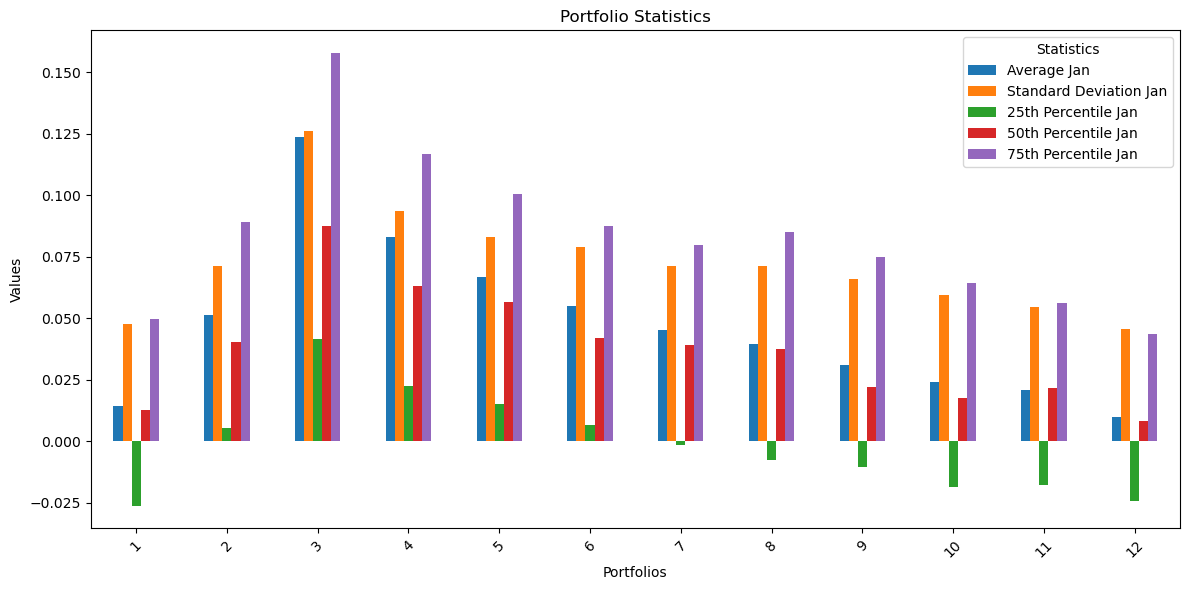

In [99]:
returns_jan = jan_data.iloc[:, 0:12]

#compute the required statistics
average_jan = returns_jan.mean()
std_dev_jan = returns_jan.std()
percentiles_25_jan = returns_jan.quantile(0.25)
percentiles_50_jan = returns_jan.quantile(0.50)
percentiles_75_jan = returns_jan.quantile(0.75)

#combine results into a df results
results_jan_a = pd.DataFrame({
    'Average Jan': average_jan,
    'Standard Deviation Jan': std_dev_jan,
    '25th Percentile Jan': percentiles_25_jan,
    '50th Percentile Jan': percentiles_50_jan,
    '75th Percentile Jan': percentiles_75_jan
})

# Display the results
print(results_jan_a)

results_jan_a.plot(kind='bar', figsize=(12, 6))
plt.title('Portfolio Statistics')
plt.ylabel('Values')
plt.xlabel('Portfolios')
plt.xticks(rotation=45)
plt.legend(title='Statistics')
plt.tight_layout()

In [124]:
#calculate skewness and excess kurtosis for each portfolio
skewness_jan = returns_jan.apply(stats.skew)
kurtosis_jan = returns_jan.apply(stats.kurtosis)

#combine results into a df results
results_jan_b = pd.DataFrame({
    'Skewness Jan': skewness_jan,
    'Kurtosis Jan': kurtosis_jan
})
print(results_jan_b)

    Skewness Jan  Kurtosis Jan
1       0.274723     -0.129460
2       1.038925      2.049882
3       1.561780      3.154623
4       1.235494      2.237451
5       1.392795      3.524747
6       1.278099      2.979721
7       1.001980      2.002326
8       0.919736      1.946063
9       0.990067      2.277840
10      0.641375      1.221979
11      0.640023      1.234361
12      0.188588     -0.312815


In [120]:
rest_data = monthly[monthly.index.month != 1]
rest_data.iloc[:, 0:12]

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1926-02-27,-0.033046,-0.053510,-0.045718,-0.067602,-0.045779,-0.079699,-0.070859,-0.053558,-0.052080,-0.056464,-0.035508,-0.022392
1926-03-31,-0.064002,-0.096824,-0.139863,-0.095192,-0.125909,-0.116952,-0.093662,-0.088367,-0.099882,-0.075299,-0.069460,-0.051874
1926-04-30,0.037029,0.032975,0.046633,0.011215,0.010318,0.055662,0.062817,0.021249,0.041720,0.044396,0.034477,0.036293
1926-05-28,0.012095,0.001035,-0.004305,-0.021611,0.002612,0.023445,0.009262,-0.009640,0.012968,0.011620,0.013865,0.013097
1926-06-30,0.053664,0.050487,0.001354,0.048366,0.063170,0.036993,0.037166,0.032904,0.055509,0.053306,0.060762,0.053729
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-0.036390,-0.007505,-0.004375,-0.000971,-0.000064,-0.015893,-0.005042,-0.007159,-0.002624,-0.024831,-0.027875,-0.038857
2022-09-30,-0.092082,-0.106628,-0.143014,-0.109047,-0.074923,-0.055172,-0.094580,-0.091499,-0.094696,-0.101456,-0.094033,-0.091623
2022-10-31,0.078679,0.051363,0.024791,0.024636,0.018751,0.029834,0.052588,0.082705,0.100846,0.105522,0.086144,0.077098


    Average rest  Standard Deviation rest  25th Percentile rest  \
1       0.008723                 0.053933             -0.018207   
2       0.008422                 0.070630             -0.022618   
3       0.007080                 0.094995             -0.034759   
4       0.006526                 0.084843             -0.030174   
5       0.006313                 0.076904             -0.025755   
6       0.006866                 0.072908             -0.026681   
7       0.007888                 0.071167             -0.024553   
8       0.008207                 0.069049             -0.023464   
9       0.008879                 0.066578             -0.023279   
10      0.008642                 0.063183             -0.022185   
11      0.009336                 0.060077             -0.019324   
12      0.008757                 0.051696             -0.016450   

    50th Percentile rest  75th Percentile rest  
1               0.012955              0.038302  
2               0.012031      

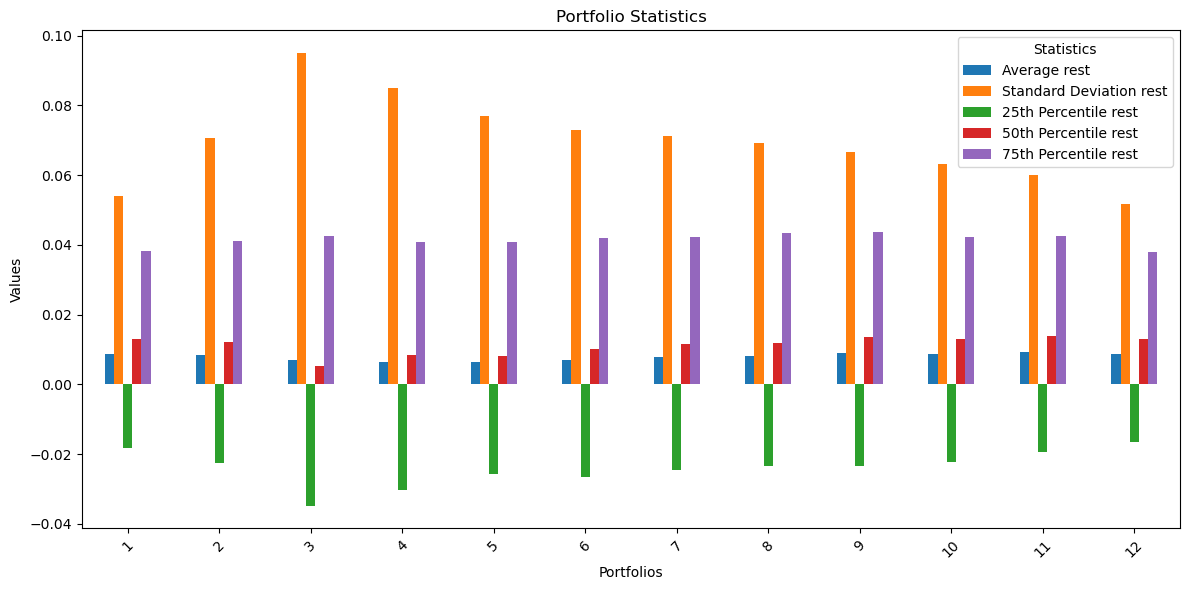

In [101]:
returns_rest = rest_data.iloc[:, 0:12]

#compute the required statistics
average_rest = returns_rest.mean()
std_dev_rest = returns_rest.std()
percentiles_25_rest = returns_rest.quantile(0.25)
percentiles_50_rest = returns_rest.quantile(0.50)
percentiles_75_rest = returns_rest.quantile(0.75)

#combine results into a df results
results_rest = pd.DataFrame({
    'Average rest': average_rest,
    'Standard Deviation rest': std_dev_rest,
    '25th Percentile rest': percentiles_25_rest,
    '50th Percentile rest': percentiles_50_rest,
    '75th Percentile rest': percentiles_75_rest
})

# Display the results
print(results_rest)

results_rest.plot(kind='bar', figsize=(12, 6))
plt.title('Portfolio Statistics')
plt.ylabel('Values')
plt.xlabel('Portfolios')
plt.xticks(rotation=45)
plt.legend(title='Statistics')
plt.tight_layout()

In [126]:
#calculate skewness and excess kurtosis for each portfolio
skewness_rest = returns_rest.apply(stats.skew)
kurtosis_rest = returns_rest.apply(stats.kurtosis)

#combine results into a df results
results_rest_b = pd.DataFrame({
    'Skewness rest': skewness_rest,
    'Kurtosis rest': kurtosis_rest
})
print(results_rest_b)

    Skewness rest  Kurtosis rest
1        0.125825       7.924023
2        1.529138      17.084776
3        3.400267      35.200954
4        2.192349      23.324068
5        2.052200      25.544791
6        1.094232      13.733070
7        0.872124      12.237604
8        0.587116       9.866522
9        0.377406       8.423326
10       0.241903       8.423954
11       0.156593       7.897367
12       0.063061       7.338267


Q2

In [1]:
# delete all variables and functions in namespace
%reset
#import the modules
import pandas as pd
import numpy as np
from datetime import datetime
from tqdm.notebook import tqdm
import statsmodels.api as sm

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
# Define the function to calculate the fitted value from recursive OLS
def pred_from_OLS(X, Y, M):

    Y_Hat = np.full((len(Y), 1), np.nan)
    Y = np.asarray(Y)
    X = np.asarray(X)
    X = sm.add_constant(X)

# We start the index at M+1 because the first element of predicted return is at t=M+2
    for i in range(M+1, len(Y)):
        Y1 = Y[1:i]
        X1 = X[0:i-1,:]
        reg = sm.OLS(Y1, X1, missing='drop').fit()
        Y_Hat[i] = reg.predict(X[i-1,:]) # 
    return Y_Hat

In [5]:
# Define the function to compute two out-of-sample measures of performance
def oos_eval(Y, Pred_Mean, Pred_Var, OOS_SSE_Hist):  

    OOS_SSE = np.sum((Y[M+1:]-Pred_Mean[M+1:])**2) #
    OOS_R2 = 1-OOS_SSE/OOS_SSE_Hist #
    w0 = ((1/gam)*(Pred_Mean/Pred_Var)).clip(None, 1.5) #
    r0 = Y*w0
    CE = np.mean(r0[M+1:])-gam/2*np.var(r0[M+1:],ddof=1) #
    return OOS_R2, CE

In [7]:
# Create the table for in-sample R^2, out-of-sample R^2 and certainty equivlance
def GW2008(X, Y, Y_Hat, M):

    # Create the benchmark using historial average
    Hist_Mean = np.asarray(Y.expanding().mean().shift())
    Hist_Variance = np.asarray(Y.expanding().var().shift())
    Y = np.asarray(Y)
    X = np.asarray(X)
    Y_Hat = np.asarray(Y_Hat)
    X = sm.add_constant(X)

    # I. In sample
    Y_1 = Y[1:]
    X_1 = X[0:len(Y)-1:]
    reg = sm.OLS(Y_1, X_1, missing='drop').fit()

    # I.1 OLS Model (non truncated)
    y1 = Y_1-np.mean(Y_1)
    e1 = Y_1-reg.predict(X_1)
    IS_R2 = 1-np.sum(e1**2)/np.sum(y1**2)

    # I.2 OLS Model (truncated)
    e1 = Y_1-reg.predict(X_1).clip(0,None)
    IS_R2_T = 1-np.sum(e1**2)/np.sum(y1**2)

    # II. Out of sample
    #II.1 Historical mean model
    OOS_SSE_Hist = np.sum((Y[M+1:]-Hist_Mean[M+1:])**2)
    #Benchmark Certainty Equivalence
    w0 = ((1/gam)*(Hist_Mean/Hist_Variance)).clip(None, 1.5);
    r0 = Y*w0
    CE0 = np.mean(r0[M+1:])-gam/2*np.var(r0[M+1:],ddof=1)

    # II.2 Forecast based on regression with expanding window
    OOS_R2, CE1 = oos_eval(Y, Y_Hat, Hist_Variance, OOS_SSE_Hist) #

    # II.3 Truncated forecast based on regression with expanding window
    OOS_R2_T, CE2 = oos_eval(Y, Y_Hat.clip(0,None), Hist_Variance, OOS_SSE_Hist) 

    # Output a Dataframe containing the calculated statistics
    data = pd.DataFrame({
                        '$R_{IS}^2$': IS_R2, # Measures how well the model explains the variability of the dependent variable within the sample used for fitting.
                        '$R^2_{IS}$ (Truncated)': IS_R2_T, # Similar to the above but only considers non-negative predictions.
                        '$R^2_{OS}$': OOS_R2, # Evaluates the model's performance on new, unseen data compared to the historical mean.
                        '$R^2_{OS}$ (Truncated)': OOS_R2_T, # Again, similar but for truncated predictions.
                        '$\Delta CEV$':CE1-CE0, #The difference in certainty equivalence between the forecasted values and the historical benchmark.
                        '$\Delta CEV$ (Truncated)': CE2-CE0 # Similar to above but for truncated predictions.
                        }, index=[indep_var])*100
    return data

In [21]:
def Pool_Avg(Y, Y_Hat, M): 
    
    # Create the benchmark using historical average
    Hist_Mean = np.asarray(Y.expanding().mean().shift())
    Hist_Variance = np.asarray(Y.expanding().var().shift())
    Y = np.asarray(Y)
    Y_Hat = np.asarray(Y_Hat)

	# Benchmark (Historical Average)
    OOS_SSE_Hist = np.sum((Y[M+1:]-Hist_Mean[M+1:])**2)
	# Benchmark Certainty Equivalence
    w0 = ((1/gam)*(Hist_Mean/Hist_Variance)).clip(None,1.5);
    r0 = Y*w0
    CE0 = np.mean(r0[M+1:])-gam/2*np.var(r0[M+1:],ddof=1)
    
	# Prepare for the pooling average
    Y_Hat_Mean = np.mean(Y_Hat,axis=1)
    Y_Hat_Median = np.full((len(Y)), np.nan)
    for i in range(M+1, len(Y)):
        Y_Hat_Median[i] = np.median(Y_Hat[i,:])
#Alternatively: Y_Hat_Median = np.median(Y_Hat,axis=1), this gives a warning message
    OOS_Error_OLS_Pool_Mean = Y-Y_Hat_Mean
    OOS_Error_OLS_Pool_Median = Y-Y_Hat_Median

	# Combination forecast based on mean of various forecasts
    OOS_R2_Pool_Mean, CE_Pool_Mean = oos_eval(Y, Y_Hat_Mean, Hist_Variance, OOS_SSE_Hist)

	# Combination forecast based on median of various forecasts
    OOS_R2_Pool_Median, CE_Pool_Median = oos_eval(Y, Y_Hat_Median, Hist_Variance, OOS_SSE_Hist)

    # Constructs a pandas DataFrame to summarize the results
    # Out-of-sample R^2 for the pooled mean and median forecasts
    # Changes in certainty equivalence for both forecast types compared to the benchmark.
    # Multiply the values by 100 to represent them as percentages.
    data = pd.DataFrame({'$R_(OS)^2$ (Pooled Mean)':OOS_R2_Pool_Mean, 
        '$\Delta CEV$ (Pooled Mean)':CE_Pool_Mean - CE0, 
      	'$R_(OS)^2$ (Pooled Median)':OOS_R2_Pool_Median, 
    	'$\Delta CEV$ (Pooled Median)':CE_Pool_Median-CE0}, 
        index=['Combination'])*100
    return data

In [11]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='openpyxl')

# Import data
df_monthly = pd.read_excel('PredictorData2022.xlsx', sheet_name="Monthly")
# Parse the dates properly
time = [str(d) for d in df_monthly.yyyymm]
df_monthly.index = pd.to_datetime(time,format="%Y%m")

In [13]:
# Variable Construction
df_monthly['ExRet'] = df_monthly['CRSP_SPvw']-df_monthly['Rfree']
df_monthly['DP'] = np.log(df_monthly['D12'])-np.log(df_monthly['Index'])
df_monthly['DY'] = np.log(df_monthly['D12'])-np.log(df_monthly['Index'].shift())
df_monthly['EP'] = np.log(df_monthly['E12'])-np.log(df_monthly['Index'])
df_monthly['DE'] = np.log(df_monthly['D12'])-np.log(df_monthly['E12'])
df_monthly['tms'] = df_monthly['lty']-df_monthly['tbl']
df_monthly['dfr'] = df_monthly['corpr']-df_monthly['ltr']
df_monthly['dfy'] = df_monthly['AAA']-df_monthly['BAA']

#Shift the inflation variable down by one period to use previous month's inflation rate for lagged purpose
df_monthly['infl'] = df_monthly['infl'].shift().copy()

# Construction of dependent and independent variables
dep_var = 'ExRet'
indep_vars = ['DE', 'svar', 'dfr', 'lty', 'ltr', 'infl', 'tms', 'tbl', 'dfy', 'DP', 'DY', 'EP', 'b/m', 'ntis']

# Create a boolean index to filter data starting from Dec 1926
subperiod = df_monthly.index>='1926-12-01'
df = df_monthly[subperiod]
M = 240 # Represent the time frame of 20 years of monthly data
gam = 3 # Represent a risk aversion coefficient

In [15]:
# Store the predicted dataframe from the pred_from_OLS function
# X is a df with column as indep_var drop 'DE' 'tms' to avoid repeated calculation
df_pred = pd.DataFrame(pred_from_OLS(df[[x for x in indep_vars if x not in('DE','tms')]],df[dep_var], M))
df_pred.columns = ['All']

# Perform OLS prediction and store the predicted data to the dataframe
for indep_var in tqdm(indep_vars):
	df_pred[indep_var] = pred_from_OLS(df[indep_var], df[dep_var], M)

  0%|          | 0/14 [00:00<?, ?it/s]

In [16]:
# Create the Table for the in- and out-of-sample performance
pd.options.display.float_format = '{:,.3f}'.format

#Get rid of d/e and tms to avoid perfect multicollinearity
data = GW2008(df[[x for x in indep_vars if x not in('DE','tms')]],
                df[dep_var], df_pred['All'], M)
data.rename(index={data.index[0]:'All'},inplace=True)

# Iterate each independent variable in indep_vars
for indep_var in indep_vars:
	x = GW2008(df[indep_var], df[dep_var], df_pred[indep_var], M)
	data = pd.concat([data, x])
data

,$R_{IS}^2$,$R^2_{IS}$ (Truncated),$R^2_{OS}$,$R^2_{OS}$ (Truncated),$\Delta CEV$,$\Delta CEV$ (Truncated)
All,2.778,2.713,-12.331,-6.524,-0.564,-0.027
DE,0.008,0.008,-0.655,-0.631,0.006,0.008
svar,0.020,0.020,-0.614,-0.604,-0.054,-0.053
dfr,0.061,0.045,-0.356,-0.278,-0.016,-0.004
lty,0.194,0.188,-0.283,0.470,-0.074,-0.015
ltr,0.224,0.210,-0.334,-0.285,0.004,0.008
infl,0.143,0.024,-0.017,0.007,-0.009,-0.008
tms,0.162,0.156,0.123,0.144,0.051,0.051
tbl,0.329,0.287,0.269,0.459,-0.009,0.001
dfy,0.256,0.256,-0.284,-0.272,-0.055,-0.055


In [23]:
# Create table for combination forecasts
Pool_Avg(df[dep_var], df_pred[indep_vars], M)

,$R_(OS)^2$ (Pooled Mean),$\Delta CEV$ (Pooled Mean),$R_(OS)^2$ (Pooled Median),$\Delta CEV$ (Pooled Median)
Combination,0.639,0.005,0.608,0.021
